In [16]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import pandas as pd
import numpy as np

In [34]:
from scipy.spatial import ConvexHull, Voronoi, Delaunay

In [17]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-04-11T22:02:53.549443,2021-04-11T22:02:53.549443
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [18]:
sb.matches(competition_id=16, season_id=1)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,18245,2018-05-26,20:45:00.000,Europe - Champions League,2017/2018,Real Madrid,Liverpool,3,1,available,unscheduled,2021-01-23T21:55:30.425330,None,7,Final,NSK Olimpijs'kyj,M. Mažić,1.1.0,2,2


In [21]:
# We take this match number 18245
dict_event = read_event(f'{EVENT_SLUG}/18245.json', related_event_df=False, tactics_lineup_df=False, warn=False)
event = dict_event['event']
tracking = dict_event['shot_freeze_frame']

In [22]:
event

,match_id,id,index,period,timestamp_minute,timestamp_second,timestamp_millisecond,minute,second,type_id,...,injury_stoppage_in_chain,shot_statsbomb_xg,shot_key_pass_id,shot_first_time,shot_one_on_one,shot_redirect,substitution_replacement_id,substitution_replacement_name,tactics_formation,aerial_won
0,18245,5eee3ffd-f0c0-4532-868b-4a66cbf20cb8,1,1,0,0,0,0,0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41212.0,NaN
1,18245,eaa65a92-02d3-4375-b2b7-7c2f679a620c,2,1,0,0,0,0,0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433.0,NaN
2,18245,9c82d2e5-ebba-4825-b7f9-b11b04433ed8,3,1,0,0,0,0,0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18245,b791047a-3eea-452f-b3a9-212bd40cd7cb,4,1,0,0,0,0,0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18245,25be91a5-a084-42cb-8cc1-a0fe7b0f52f9,5,1,0,0,371,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,18245,b4258521-d4ec-466d-a90c-e4522692a45b,3493,2,47,30,959,92,30,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3493,18245,37f51448-ebd1-4d67-8d9e-fa4b450111b2,3494,2,47,33,52,92,33,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3494,18245,e9f7bb50-f4fc-45aa-87d3-20bbe9ebd32f,3495,2,47,39,157,92,39,40,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3495,18245,ce7d446a-e8bf-4631-bcf5-2bd323ba251e,3496,2,48,2,893,93,2,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
event.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Ball Recovery', 'Pressure', 'Clearance', 'Foul Won',
       'Foul Committed', 'Miscontrol', 'Dispossessed', 'Duel',
       'Dribbled Past', 'Dribble', 'Block', 'Shot', 'Goal Keeper',
       'Interception', 'Error', '50/50', 'Injury Stoppage',
       'Substitution', 'Tactical Shift', 'Offside', 'Half End'],
      dtype=object)

In [23]:
tracking

,id,event_freeze_id,player_teammate,player_id,player_name,player_position_id,player_position_name,x,y,match_id
0,682270cc-4bc4-4952-8f91-d3c5a704a691,1,False,5463,Luka Modrić,13,Right Center Midfield,98.0,48.4,18245
1,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,1,True,3535,Roberto Firmino Barbosa de Oliveira,23,Center Forward,109.0,39.9,18245
2,399ac143-5f7b-4080-8c0b-3c18435d7fc1,1,True,3655,Andrew Robertson,6,Left Back,102.1,2.5,18245
3,660d9d98-46b6-4b5e-9c9a-435d63142c93,1,True,4926,Francisco Román Alarcón Suárez,19,Center Attacking Midfield,100.2,11.0,18245
4,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,1,True,3629,Sadio Mané,21,Left Wing,90.9,32.3,18245
...,...,...,...,...,...,...,...,...,...,...
356,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,16,False,5463,Luka Modrić,13,Right Center Midfield,99.9,19.0,18245
357,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,17,False,5463,Luka Modrić,13,Right Center Midfield,99.2,50.3,18245
358,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,17,False,5201,Sergio Ramos García,5,Left Center Back,114.1,42.9,18245
359,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,18,False,5574,Toni Kroos,15,Left Center Midfield,102.7,37.0,18245


In [102]:
tracking_1 = tracking[['id', 'x', 'y', 'player_teammate']]
tracking_1 = tracking_1.rename(columns={'player_teammate':'Team', 'id': 'Shot_id'})
tracking_1['Team'] *= 1
tracking_1

,Shot_id,x,y,Team
0,682270cc-4bc4-4952-8f91-d3c5a704a691,98.0,48.4,0
1,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,109.0,39.9,1
2,399ac143-5f7b-4080-8c0b-3c18435d7fc1,102.1,2.5,1
3,660d9d98-46b6-4b5e-9c9a-435d63142c93,100.2,11.0,1
4,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,90.9,32.3,1
...,...,...,...,...
356,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,99.9,19.0,0
357,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,99.2,50.3,0
358,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,114.1,42.9,0
359,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,102.7,37.0,0


In [103]:
# choose a particular Shot_id for capturing the particular moment of player positions when the shot was taken
shot = 'fe6c7f60-2ff0-4077-882e-b045c8abc7c3'

In [104]:
tracking_2 = tracking_1[tracking_1['Shot_id'] == shot].reset_index()
tracking_2

,index,Shot_id,x,y,Team
0,4,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,90.9,32.3,1
1,32,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,118.4,37.3,0
2,60,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,106.4,52.1,0
3,88,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,111.8,35.5,0
4,116,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,106.2,32.3,0
5,144,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,106.7,26.1,0
6,172,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,99.1,46.7,0
7,199,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,103.3,31.4,0
8,225,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,98.6,27.0,0
9,251,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,98.2,17.9,0


In [105]:
tracking_3 = tracking_2[['x', 'y', 'Team']]
tracking_Real = tracking_3[tracking_3['Team']==0]
tracking_Liverpool = tracking_3[tracking_3['Team']==1]
tracking_Liverpool

,x,y,Team
0,90.9,32.3,1
10,103.4,52.2,1
11,112.7,32.0,1
12,106.2,18.0,1
13,87.4,47.1,1


In [106]:
tracking_2
tracking_3 = tracking_2[['x', 'y', 'Team']]
tracking_3

,x,y,Team
0,90.9,32.3,1
1,118.4,37.3,0
2,106.4,52.1,0
3,111.8,35.5,0
4,106.2,32.3,0
5,106.7,26.1,0
6,99.1,46.7,0
7,103.3,31.4,0
8,98.6,27.0,0
9,98.2,17.9,0


In [107]:
points = tracking_3[['x', 'y']].values
points

array([[ 90.9,  32.3],
       [118.4,  37.3],
       [106.4,  52.1],
       [111.8,  35.5],
       [106.2,  32.3],
       [106.7,  26.1],
       [ 99.1,  46.7],
       [103.3,  31.4],
       [ 98.6,  27. ],
       [ 98.2,  17.9],
       [103.4,  52.2],
       [112.7,  32. ],
       [106.2,  18. ],
       [ 87.4,  47.1]])

In [108]:
tess = Delaunay(tracking_3[['x', 'y']])
tess

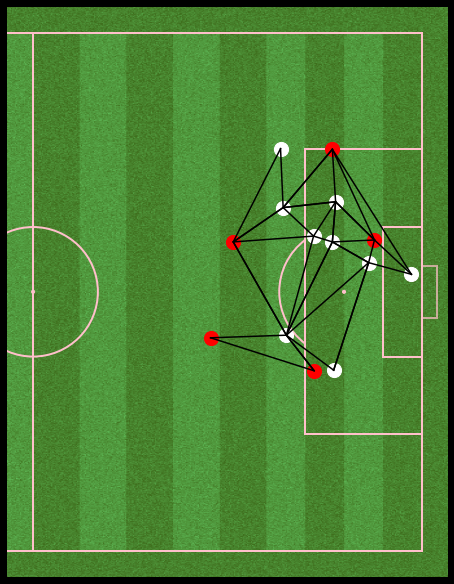

In [134]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='grass', line_color='pink', figsize=(13.5, 8), stripe=True,
              constrained_layout=True, tight_layout=False, view='half', goal_type='box')
fig, ax = pitch.draw()

plt.scatter(tracking_Real.x, tracking_Real.y, color='white', s=200)
plt.scatter(tracking_Liverpool.x, tracking_Liverpool.y, color='red', s=200)

for i in tess.simplices:
        plt.plot(points[i, 0], points[i, 1], 'black')

In [128]:
X = tracking_3.x
Y = tracking_3.y
Team = tracking_3.Team
Liverpool, Real = pitch.voronoi(X, Y, Team)

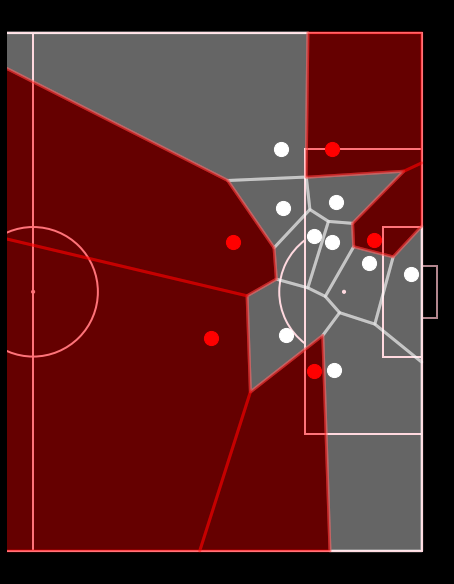

In [132]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='black', line_color='pink', figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False, view='half', goal_type='box')
fig, ax = pitch.draw()

plt.scatter(tracking_Real.x, tracking_Real.y, color='white', s=200)
plt.scatter(tracking_Liverpool.x, tracking_Liverpool.y, color='red', s=200)

vR = pitch.polygon(Real, fc='white', ax=ax, ec='white', lw=3, alpha=0.4)
vL = pitch.polygon(Liverpool, fc='red', ax=ax, ec='red', lw=3, alpha=0.4)